In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path


In [2]:
BASE_DIR = Path("../data")
MACHINE_TYPES = ["fan", "pump", "slider", "valve", "toycar", "toyconveyor"]

print("Data map:", BASE_DIR.resolve())
print("Beschikbare machine types:", MACHINE_TYPES)


Data map: C:\Users\Esmee Werk\Documents\Persoonlijke Projecten\AI-Onderzoeksvragen\research_questions\unsupervised_learning\data
Beschikbare machine types: ['fan', 'pump', 'slider', 'valve', 'toycar', 'toyconveyor']


In [3]:
def list_audio_files(machine_type, subset="train"):
    """
    Geeft een lijst met paden naar .wav-bestanden.
    subset: 'train' of 'test'
    """
    machine_dir = BASE_DIR / machine_type / subset
    files = sorted(machine_dir.glob("*.wav"))
    return files

# Voorbeeld: toon de eerste 5 bestanden van één machine
example_files = list_audio_files("fan", "train")[:5]
print("Voorbeeldbestanden (fan/train):")
for f in example_files:
    print(" -", f.name)

Voorbeeldbestanden (fan/train):
 - normal_id_00_00000000.wav
 - normal_id_00_00000001.wav
 - normal_id_00_00000002.wav
 - normal_id_00_00000003.wav
 - normal_id_00_00000004.wav


In [4]:
example_path = example_files[0]

In [5]:
# Laad audio
y, sr = librosa.load(example_path, sr=None)
print(f"\nAudio sample: {example_path.name}")
print(f"Lengte: {len(y)/sr:.2f} sec, Sample rate: {sr} Hz")


Audio sample: normal_id_00_00000000.wav
Lengte: 10.00 sec, Sample rate: 16000 Hz


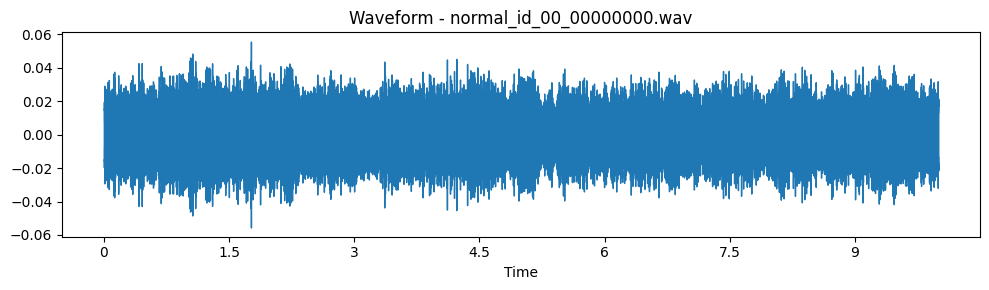

In [6]:
# Plot waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform - {example_path.name}")
plt.tight_layout()
plt.show()

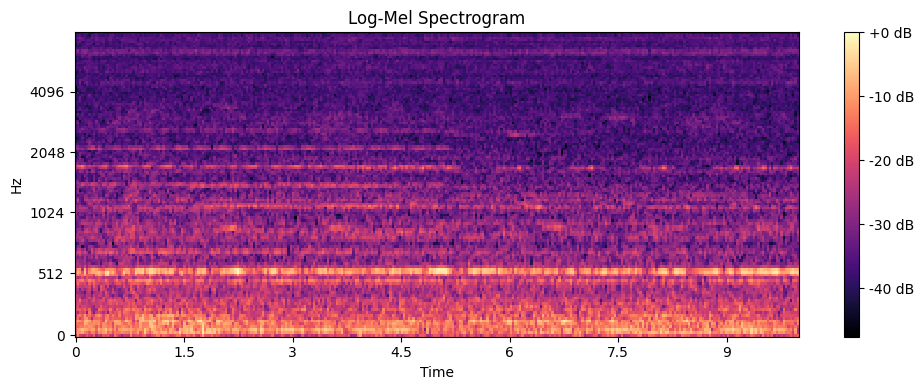

In [7]:
# Maak log-Mel spectrogram
n_fft = 1024
hop_length = 512
n_mels = 128

S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft,
                                   hop_length=hop_length, n_mels=n_mels)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Log-Mel Spectrogram")
plt.tight_layout()
plt.show()

In [8]:
def summarize_dataset():
    data_summary = []
    for machine in MACHINE_TYPES:
        for subset in ["train", "test"]:
            path = BASE_DIR / machine / subset
            n_files = len(list(path.glob("*.wav")))
            data_summary.append({"machine": machine, "subset": subset, "n_files": n_files})
    return pd.DataFrame(data_summary)

df_summary = summarize_dataset()
print("\nDataset overzicht:")
print(df_summary)


Dataset overzicht:
        machine subset  n_files
0           fan  train     3675
1           fan   test     1875
2          pump  train     3349
3          pump   test      856
4        slider  train     2804
5        slider   test     1290
6         valve  train     3291
7         valve   test      879
8        toycar  train     4000
9        toycar   test     2459
10  toyconveyor  train     3000
11  toyconveyor   test     3509
